# Task 34: Deep Learning with TensorFlow/Keras:

Explore some basics of ANN and a simple implementation of an **Artificial Neural Network (ANN)**.

An artificial neural network is composed of numbers of neurons which is compared to the neurons in the human brain.
It is designed to make a computer learn from small insights and features and make them autonomous to learn from the real world and provide solutions in real-time faster than a human.

A neuron in an artificial neural network, will perform two operations inside it
*   Sum of all weights
*   Activation function

Tensorflow is a powerful machine learning library to create models and neural networks.

So a basic Artificial neural network will be in a form of,


*   **Input Layer** - To get the data from the user or a client or a server to analyze and give the result.
*   **Hidden Layer** - This layer can be in any number and these layers will analyze the inputs with passing through them with different biases, weights, and activation functions to provide an output.
*   **Output Layer** -  This is where we can get the result from a neural network.

### Importing the Libraries:

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

### Importing the Data:

In [3]:
df = pd.read_csv('data.csv')
df.head()

,x,y,color
0,3.625129,-3.616050,0
1,0.450653,3.456542,0
2,-2.240810,-1.756232,1
3,2.629776,-1.444564,1
4,-0.231897,-1.963792,0


In [4]:
# last five rows

df.tail()

,x,y,color
19995,1.349569,4.204027,1
19996,4.519542,-3.626455,0
19997,4.288267,-2.706370,1
19998,-2.195821,-1.698437,0
19999,-3.107330,4.350174,1


In [5]:
# No. of rows and columns

df.shape

(20000, 3)

### Visualize the Data:

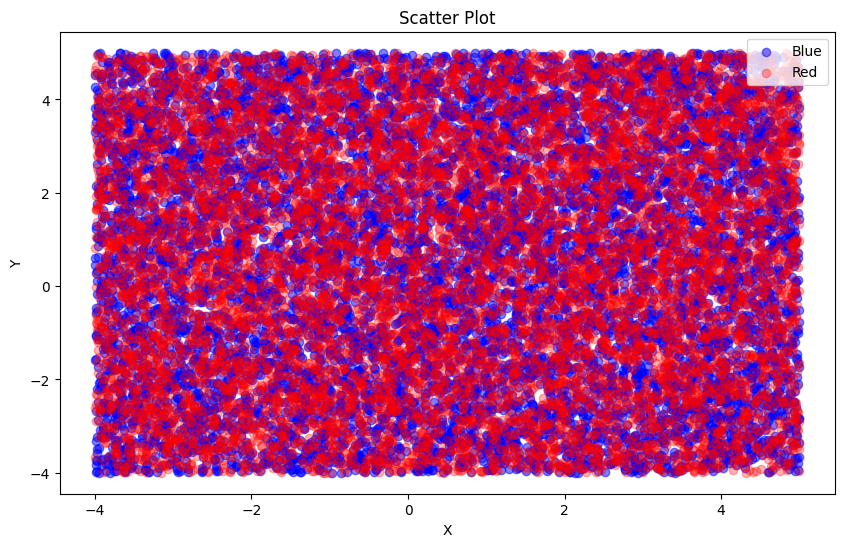

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
# plot blue points (color == 0)
plt.scatter(df[df['color'] == 0]['x'], df[df['color'] == 0]['y'], color='blue', alpha=0.5, label='Blue')
# plot red points (color == 1)
plt.scatter(df[df['color'] == 1]['x'], df[df['color'] == 1]['y'], color='red', alpha=0.3, label='Red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.legend()
plt.show()

### Splitting the data:

In [9]:
# split the data into train and test set

train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [10]:
# constructing the input

x = np.column_stack((train.x.values, train.y.values))
y = train.color.values

### Building a model:

Build a simple artificial neural network to classify the color of the point with two input nodes and a hidden layer and an output layer with relu and sigmoid activation functions, and sparse categorical cross-entropy loss function and this is going to be a fully connected feed-forward network.

In [11]:
# defining the model

model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(2,), activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

# compiling the model

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# fitting the model

model.fit(x, y, epochs=10, batch_size=8)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4996 - loss: 1.0825
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5111 - loss: 0.6948
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5032 - loss: 0.6941
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5103 - loss: 0.6936
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5032 - loss: 0.6938
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4991 - loss: 0.6936
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5081 - loss: 0.6929
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5110 - loss: 0.6932
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5066 - loss: 0.6935
Epoch 10/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5068 - loss: 0.6933


If we evaluate the model with unseen data it will give a very low amount of accuracy.

In [12]:
# evaluating the model

x = np.column_stack((test.x.values, test.y.values))
y = test.color.values
model.evaluate(x, y, batch_size=8)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4911 - loss: 0.6936


[0.6934536695480347, 0.4964999854564667]

### Building a better model:

Now we are going to improve the model with a few extra hidden layers and a better activation function ‘softmax’ in the output layer and built a better artificial neural network.

In [13]:
# defining model

model_better = keras.Sequential([
    keras.layers.Dense(16, input_shape=(2,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# compiling the model

model_better.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# constructing the input
x = np.column_stack((train.x.values, train.y.values))
y = train.color.values

# fitting the model

model_better.fit(x, y, epochs=10, batch_size=8)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4993 - loss: 0.6961
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5049 - loss: 0.6940
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4956 - loss: 0.6935
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5079 - loss: 0.6932
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5024 - loss: 0.6933
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4982 - loss: 0.6932
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5027 - loss: 0.6933
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5030 - loss: 0.6931
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5016 - loss: 0.6932
Epoch 10/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5054 - loss: 0.6932


### Evaluating the model:

In [16]:
# evaluating the model

x = np.column_stack((test.x.values, test.y.values))
y = test.color.values
model_better.evaluate(x, y, batch_size=8)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4765 - loss: 0.6936


[0.6934633851051331, 0.48524999618530273]